In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import PathPatch
import pingouin as pg
tz="Etc/GMT-10"

c:\Users\s3928927\.conda\envs\eeg\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\s3928927\.conda\envs\eeg\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\s3928927\.conda\envs\eeg\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def remove_data(df):
    # the data are removed for interruption in the experiment or bad data quality
    data_remove1 = [('PA11', '353.0'), ('PA13', '419.0'), ('PA23', '433.0'), \
                   ('PA23', '725.0'), ('PA26', '433.0'), ('PA26', '448.0'), ('PA26', '416.0')]
    data_remove2 = [('PA11', 353), ('PA13', 419), ('PA23', 433), ('PA23', 725), ('PA26', 433), ('PA26', 448), ('PA26', 416)]
    print('Data to Remove', data_remove1)
    print('-> Before', df.shape)
    nums_drop = 0
    for (pid, tid) in data_remove1 + data_remove2:
        nums_drop += df[(df.PID == pid) & (df.Topic == tid)].shape[0]
        df.drop(df[(df.PID == pid) & (df.Topic == tid)].index, inplace=True) 
    plist = df.PID.unique()
    print(nums_drop, 'should droped')
    print('--> after remove unwanted data', df.shape, 'from', len(plist), 'Participants')
    print(plist)
    return df, plist

def load_data(file):
    df = pd.read_csv(file, index_col=0).reset_index(drop=True)
    df = df[~df.PID.isin(['PA2', 'PA3', 'PA4'])]
    df.replace({'SR': 'RJ'}, inplace=True)
    df, plist = remove_data(df)
    df = df[df.stage.isin(conditions+baseline)]
    df.drop(columns=['name', 'task'], inplace=True)
    
    data = []
    for (pid, topic, stage) in df[['PID', 'Topic', 'stage']].value_counts().index:
        tt = df[(df.PID == pid) & (df.Topic == topic) & (df.stage == stage)]
        t = tt.mean(numeric_only=True).to_frame().transpose()
        t['PID'] = pid
        t['Topic'] = topic
        t['stage'] = stage
        data.append(t)
        
    df = pd.concat(data)
    df = df.reset_index(drop=True)
    print('--> Final Loaded Data:', df.shape)
    print(df.stage.value_counts())
    return df

c:\Users\s3928927\.conda\envs\eeg\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
conditions = ['IN', 'QF', 'QS', 'RJ', 'READ', 'LISTEN', 'SPEAK', 'TYPE']
baseline = ['EYEOPEN','EYECLOSE']
info_cols = ['stage', 'Topic', 'PID', 'name']
stats = []
postdoc_results = []

In [5]:
eoi = ['EYEOPEN', 'IN', 'QF', 'TYPE','SPEAK', 'LISTEN',  'READ', ]

colors = {'EYEOPEN':  '#00A0B0', 'BASELINE':  '#00A0B0', 'EYECLOSE':  '#00A0B0',
 'IN': '#59C4D4',
 'QF': '#cc333f',
 'QS': '#eb6841',
 'RJ': '#edc951',
 'READ': '#a58c38',
 'LISTEN': '#f2d985',
 'SPEAK': '#a4482d', 'TYPE': '#ef8666'}


boxprops={
    'palette': colors,
     'flierprops': {"marker": "x"},
    'boxprops': {"edgecolor": "white"},
     'medianprops':{"color": "white", "linewidth": 0},
    'showmeans': True, 'meanline': True, 'meanprops': {'color': 'white','ls': '--', 'lw': 1.5},
}


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

#### EDA

In [25]:
parent_d = 'C:\\Users\\s3928927\\RQ2_dataset_paper\\data code\\'
eda = load_data(parent_d+'data for analysis/EDA_features(2-1).csv')
eda = eda[df.PID != 'PA14'] #PA14 does not have E4 baseline data, so removed. 
eda.head(3)

Data to Remove [('PA11', '353.0'), ('PA13', '419.0'), ('PA23', '433.0'), ('PA23', '725.0'), ('PA26', '433.0'), ('PA26', '448.0'), ('PA26', '416.0')]
-> Before (65508, 39)
1233 should droped
--> after remove unwanted data (64275, 39) from 29 Participants
['PA5' 'PA6' 'PA7' 'PA8' 'PA9' 'PA10' 'PA11' 'PA12' 'PA13' 'PA14' 'PA15'
 'PA16' 'PA17' 'PA18' 'PA19' 'PA20' 'PA21' 'PA22' 'PA23' 'PA24' 'PA25'
 'PA26' 'PA27' 'PA28' 'PA29' 'PA30' 'PA31' 'PA32' 'PA33']
--> Final Loaded Data: (2102, 37)
stage
RJ          341
IN          341
QS          341
QF          341
TYPE        173
READ        171
LISTEN      170
SPEAK       168
EYEOPEN      28
EYECLOSE     28
Name: count, dtype: int64


C:\Users\s3928927\AppData\Local\Temp\ipykernel_4896\1773967818.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eda = eda[df.PID != 'PA14'] #PA14 does not have E4 baseline data, so removed.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df.columns

In [ ]:
for depvar in ['E4:EDA_mean', 'E4:SCL_mean', 'E4:SCR_amp_norm']:
    print(depvar)
    d = pg.normality(data=df[df.stage.isin(eoi)], dv=depvar, group='stage')
    print(d)
    d = pg.homoscedasticity(data=df[df.stage.isin(eoi)], dv=depvar, group='stage')
    print(d)
    print('-'*10)

In [ ]:
for depvar in ['E4:EDA_mean', 'E4:SCL_mean', 'E4:SCR_amp_norm']:
    print(depvar)
    d = pg.friedman(data=df[df.stage.isin(eoi)], dv=depvar, within='stage', subject='PID', method='f')
    d['variable'] = depvar
    stats.append(d)
stats

In [ ]:
for depvar in ['E4:EDA_mean', 'E4:SCL_mean', 'E4:SCR_amp_norm']:
    d = pg.pairwise_tests(data=df[df.stage.isin(eoi)], dv=depvar, within='stage', subject='PID', parametric=False, 
                          padjust='bonf', correction=True)
    d['variable'] = depvar
    postdoc_results.append(d)
postdoc_results

#### ACC

In [118]:
df = load_data('data for analysis/ACC_features(2-1).csv')#../trainning data/EDA_features_combined_mergedtw.csv')
df.head(3)

Data to Remove [('PA11', '353.0'), ('PA13', '419.0'), ('PA23', '433.0'), ('PA23', '725.0'), ('PA26', '433.0'), ('PA26', '448.0'), ('PA26', '416.0')]
-> Before (66786, 10)
1257 should droped
--> after remove unwanted data (65529, 10) from 29 Participants
['PA5' 'PA6' 'PA7' 'PA8' 'PA9' 'PA10' 'PA11' 'PA12' 'PA13' 'PA14' 'PA15'
 'PA16' 'PA17' 'PA18' 'PA19' 'PA20' 'PA21' 'PA22' 'PA23' 'PA24' 'PA25'
 'PA26' 'PA27' 'PA28' 'PA29' 'PA30' 'PA31' 'PA32' 'PA33']
--> Final Loaded Data: (2102, 8)
stage
RJ          341
IN          341
QS          341
QF          341
TYPE        173
READ        171
LISTEN      170
SPEAK       168
EYECLOSE     28
EYEOPEN      28
Name: count, dtype: int64


,E4:ACC_mean,E4:ACC_sd,E4:ACC_range,E4:ACC_max,E4:ACC_min,PID,Topic,stage
0,62.456080,0.177708,0.562122,62.769731,62.207609,PA10,448.0,RJ
1,62.456080,0.177708,0.562122,62.769731,62.207609,PA10,448.0,READ
2,64.198628,0.137875,0.387018,64.390945,64.003927,PA29,355.0,READ


In [119]:
d = pg.normality(data=df[df.stage.isin(eoi)], dv='E4:ACC_mean', group='stage')
print(d)
d = pg.homoscedasticity(data=df[df.stage.isin(eoi)], dv='E4:ACC_mean', group='stage')
print(d)
print('-'*10)

                W          pval  normal
stage                                  
READ     0.909926  9.540752e-09   False
IN       0.935736  5.632525e-11   False
LISTEN   0.890944  7.552199e-10   False
TYPE     0.918124  2.841639e-08   False
SPEAK    0.927966  1.983617e-07   False
EYEOPEN  0.799050  1.027130e-04   False
QF       0.936399  6.618179e-11   False
               W      pval  equal_var
levene  2.340478  0.029722      False
----------


In [120]:
d = pg.friedman(data=df[df.stage.isin(eoi)], dv='E4:ACC_mean', within='stage', subject='PID', method='f')
d['variable']='E4:ACC_mean'
print(d.round(3))
stats.append(d)

         Source      W  ddof1    ddof2      F  p-unc     variable
Friedman  stage  0.178  5.929  160.071  5.844    0.0  E4:ACC_mean


In [121]:
d = pg.pairwise_tests(data=df[df.stage.isin(eoi)], dv='E4:ACC_mean', within='stage', subject='PID', parametric=False,
                         padjust='bonf', correction=True)
d['variable']='E4:ACC_mean'
postdoc_results.append(d)

#### PUPIL

In [18]:
df = load_data('data for analysis/PUPIL_features(2-1).csv')
df.dropna(inplace=True)
df = df[df.stage.isin(eoi)]
df

Data to Remove [('PA11', '353.0'), ('PA13', '419.0'), ('PA23', '433.0'), ('PA23', '725.0'), ('PA26', '433.0'), ('PA26', '448.0'), ('PA26', '416.0')]
-> Before (51356, 7)
1109 should droped
--> after remove unwanted data (50247, 7) from 27 Participants
['PA5' 'PA6' 'PA7' 'PA8' 'PA9' 'PA10' 'PA11' 'PA12' 'PA13' 'PA14' 'PA15'
 'PA16' 'PA17' 'PA18' 'PA19' 'PA21' 'PA22' 'PA23' 'PA24' 'PA25' 'PA26'
 'PA27' 'PA28' 'PA29' 'PA30' 'PA31' 'PA32']
--> Final Loaded Data: (1927, 5)
stage
RJ         317
IN         317
QF         317
QS         316
TYPE       161
READ       159
LISTEN     158
SPEAK      155
EYEOPEN     27
Name: count, dtype: int64


,PUPIL_mean,PUPIL_mean_RPD,PID,Topic,stage
1,-0.103222,-0.048390,PA10,448.0,READ
2,-0.164278,-0.064667,PA29,355.0,READ
5,-0.166123,-0.057309,PA13,355.0,READ
6,-0.304267,-0.106382,PA19,743.0,READ
8,0.104203,0.035948,PA13,433.0,IN
...,...,...,...,...,...
1910,0.333094,0.108250,PA11,433.0,LISTEN
1916,-0.454106,-0.139383,PA18,433.0,LISTEN
1918,0.012872,0.004528,PA21,419.0,QF
1920,0.270345,0.082980,PA18,353.0,SPEAK


In [25]:
df[['PID','PUPIL_mean']].groupby('PID').std()

,PUPIL_mean
PID,
PA10,0.093848
PA11,0.274390
PA12,0.236912
PA13,0.199951
PA14,0.156314
PA15,0.219530
PA16,0.169113
PA17,0.251140
PA18,0.276757


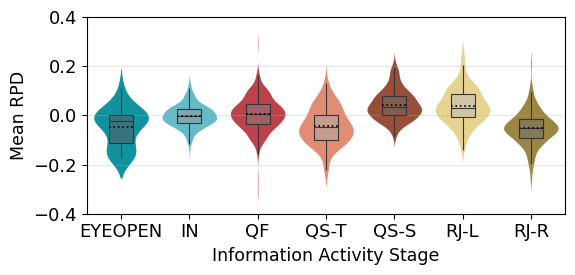

In [32]:
output = 1
xticks = ['EYEOPEN', 'IN', 'QF',  'QS-T', 'QS-S',  'RJ-L', 'RJ-R',]
_, ax = plt.subplots(figsize=(6, 3))
ax = sns.violinplot(data=df[df.stage.isin(eoi)], x='stage', y='PUPIL_mean_RPD', hue='stage', inner=None, \
                    linewidth=0, saturation=0.8,  palette=colors, order=eoi,)
sns.boxplot(data=df[df.stage.isin(eoi)], x='stage', y='PUPIL_mean_RPD', hue='stage', saturation=0.4, showcaps=False,
                     palette=colors, width=0.35, linewidth=0.8, showfliers=False, boxprops={'zorder': 2,},\
            ax=ax, **{'showmeans': True, 'meanline': True, 'meanprops': {'color': 'black','ls': ':', 'lw': 1.2}},order=eoi,)
ax.set_xticks(eoi, labels=xticks)
ax.set_yticks(np.arange(-0.4, 0.5, 0.2))
ax.grid(axis='y', alpha=0.3)
ax.set_ylabel('Mean RPD', size='small')
ax.set_xlabel('Information Activity Stage', size='small')
plt.tight_layout()
if output:
    plt.savefig('../images/RPD_box.pdf', bbox_inches='tight')
plt.show()

In [176]:
d = pg.friedman(data=df[df.stage.isin(eoi)], dv='PUPIL_mean_RPD', within='stage', subject='PID', method='f')
d['variable']='PUPIL_mean_RPD'
print(d.round(3))
stats.append(d)

         Source     W  ddof1   ddof2     F  p-unc        variable
Friedman  stage  0.29  5.882  94.118  6.54    0.0  PUPIL_mean_RPD


In [177]:
d = pg.pairwise_tests(data=df[df.stage.isin(eoi)], dv='PUPIL_mean_RPD', within='stage', subject='PID', parametric=False,
                         padjust='bonf', correction=True)
d['variable']='PUPIL_mean_RPD'
postdoc_results.append(d)

#### export results to csv

In [178]:
stats = pd.concat(stats)
postdoc_results = pd.concat(postdoc_results)

In [179]:
stats

,Source,W,ddof1,ddof2,F,p-unc,variable
Friedman,stage,0.043276,5.928571,160.071429,1.221312,2.982748e-01,E4:EDA_mean
Friedman,stage,0.058127,5.928571,160.071429,1.666280,1.334210e-01,E4:SCL_mean
Friedman,stage,0.271375,5.928571,160.071429,10.056099,2.390049e-09,E4:SCR_amp_norm
Friedman,stage,0.290163,5.882353,94.117647,6.540390,9.780812e-06,PUPIL_mean_RPD


In [180]:
postdoc_results

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,hedges,variable
0,stage,EYEOPEN,IN,True,False,153.0,two-sided,0.264172,1.000000,bonf,-0.228385,E4:EDA_mean
1,stage,EYEOPEN,LISTEN,True,False,117.0,two-sided,0.050499,1.000000,bonf,-0.244877,E4:EDA_mean
2,stage,EYEOPEN,QF,True,False,151.0,two-sided,0.245096,1.000000,bonf,-0.228835,E4:EDA_mean
3,stage,EYEOPEN,READ,True,False,156.0,two-sided,0.294598,1.000000,bonf,-0.252231,E4:EDA_mean
4,stage,EYEOPEN,SPEAK,True,False,150.0,two-sided,0.235917,1.000000,bonf,-0.333770,E4:EDA_mean
...,...,...,...,...,...,...,...,...,...,...,...,...
16,stage,QF,SPEAK,True,False,28.0,two-sided,0.020157,0.423294,bonf,-0.906279,PUPIL_mean_RPD
17,stage,QF,TYPE,True,False,36.0,two-sided,0.056885,1.000000,bonf,0.676519,PUPIL_mean_RPD
18,stage,READ,SPEAK,True,False,7.0,two-sided,0.000290,0.006088,bonf,-1.989380,PUPIL_mean_RPD
19,stage,READ,TYPE,True,False,56.0,two-sided,0.352875,1.000000,bonf,-0.273798,PUPIL_mean_RPD


In [181]:
if 'EYECLOSE' in eoi:
    stats.to_csv('../results/periphs_stats_results_6stages_withEC.csv', index=False)
    postdoc_results.to_csv('../results/periphs_postdoc_results_6stages_withEC.csv', index=False)
else:
    stats.to_csv('../results/periphs_stats_results_6stages.csv', index=False)
    postdoc_results.to_csv('../results/periphs_postdoc_results_6stages.csv', index=False)

#### plot pupil dilation

In [182]:
df = pd.read_csv('data for analysis/PUPIL_features_1s.csv', index_col=0).reset_index(drop=True)#../trainning data/EDA_features_combined_mergedtw.csv')
df = df[~df.PID.isin(['PA2', 'PA3', 'PA4'])]
df.replace({'SR': 'RJ'}, inplace=True)
df, plist = remove_data(df)
df = df[df.stage.isin(conditions+baseline)]

df = df.reset_index(drop=True)
print('--> Final Loaded Data:', df.shape)
print(df.stage.value_counts())

Data to Remove [('PA11', '353.0'), ('PA13', '419.0'), ('PA23', '433.0'), ('PA23', '725.0'), ('PA26', '433.0'), ('PA26', '448.0'), ('PA26', '416.0')]
-> Before (52862, 16)
1143 should droped
--> after remove unwanted data (51719, 16) from 27 Participants
['PA5' 'PA6' 'PA7' 'PA8' 'PA9' 'PA10' 'PA11' 'PA12' 'PA13' 'PA14' 'PA15'
 'PA16' 'PA17' 'PA18' 'PA19' 'PA21' 'PA22' 'PA23' 'PA24' 'PA25' 'PA26'
 'PA27' 'PA28' 'PA29' 'PA30' 'PA31' 'PA32']
--> Final Loaded Data: (51719, 16)
stage
RJ         16751
LISTEN      8576
READ        8063
IN          7540
QS          4155
QF          3055
TYPE        2162
SPEAK       1012
EYEOPEN      405
Name: count, dtype: int64


In [210]:
dd = df[['PUPIL_mean_RPD', 'n', 'task', 'stage', 'Topic', 'PID']]
dd = dd[dd.stage.isin(['EYEOPEN', 'IN', 'READ'])].reset_index(drop=True)
dd

,PUPIL_mean_RPD,n,task,stage,Topic,PID
0,0.022367,1,1,IN,433.0,PA5
1,-0.015382,2,1,IN,433.0,PA5
2,-0.071987,3,1,IN,433.0,PA5
3,-0.046258,4,1,IN,433.0,PA5
4,-0.079349,5,1,IN,433.0,PA5
...,...,...,...,...,...,...
16003,0.031943,11,Baseline,EYEOPEN,Baseline,PA32
16004,-0.005020,12,Baseline,EYEOPEN,Baseline,PA32
16005,-0.034943,13,Baseline,EYEOPEN,Baseline,PA32
16006,-0.002286,14,Baseline,EYEOPEN,Baseline,PA32


In [184]:
groups = list(dd[['PID', 'task', 'stage']].value_counts().index)
pupildf = []
nwindow = 3
for group in groups:
    temp = dd[(dd.PID == group[0]) & (dd.task == group[1]) & (dd.stage == group[2])].sort_values(by='n')
    interval = int(np.around(len(temp)/nwindow, decimals=0))
    tt = temp['PUPIL_mean_RPD'].values
    res = []
    wsize = []
    prev = 0
    for n in range(nwindow):
        n = prev+interval
        if n == nwindow-1:
            res.append(np.mean(tt[prev:]))
            wsize.append(len(tt[prev:]))
        else:
            res.append(np.mean(tt[prev:n]))
            wsize.append(len(tt[prev:n]))
        prev = n
        
    tdf = pd.DataFrame([res, np.arange(nwindow)+1, wsize, np.repeat(len(temp), nwindow),\
                            np.repeat(group[0], nwindow), np.repeat(group[1], nwindow), np.repeat(group[2], nwindow)], 
                          index=['PUPIL_mean_RPD', 'n', 'win_size', 'total', 'PID', 'task', 'stage']).transpose()
    pupildf.append(tdf)
pupildf = pd.concat(pupildf).reset_index(drop=True)
print(pupildf)

     PUPIL_mean_RPD  n win_size total   PID task stage
0         -0.021898  1       43   130  PA10   10  READ
1         -0.053431  2       43   130  PA10   10  READ
2          -0.06984  3       43   130  PA10   10  READ
3         -0.042124  1       39   118  PA29    5  READ
4         -0.065635  2       39   118  PA29    5  READ
...             ... ..      ...   ...   ...  ...   ...
1504      -0.057056  2        2     7   PA5   11    IN
1505      -0.087152  3        2     7   PA5   11    IN
1506       0.008565  1        6     6  PA31    9    IN
1507       0.024996  2        2     6  PA31    9    IN
1508       0.028573  3        2     6  PA31    9    IN

[1509 rows x 7 columns]


In [185]:
pupildf.dropna(inplace=True)
pupildf

,PUPIL_mean_RPD,n,win_size,total,PID,task,stage
0,-0.021898,1,43,130,PA10,10,READ
1,-0.053431,2,43,130,PA10,10,READ
2,-0.06984,3,43,130,PA10,10,READ
3,-0.042124,1,39,118,PA29,5,READ
4,-0.065635,2,39,118,PA29,5,READ
...,...,...,...,...,...,...,...
1504,-0.057056,2,2,7,PA5,11,IN
1505,-0.087152,3,2,7,PA5,11,IN
1506,0.008565,1,6,6,PA31,9,IN
1507,0.024996,2,2,6,PA31,9,IN


In [186]:
pupildf[['stage', 'win_size', 'total']].groupby('stage').mean()

,win_size,total
stage,,
EYEOPEN,5.0,15.0
IN,7.839662,23.765823
READ,16.726115,50.541401


In [205]:
pupildf['stage'] = pupildf['stage'].apply(lambda x: {'EYEOPEN': 'EYEOPEN', 'IN':'IN', 'READ': 'RJ-READ', 'RJ-READ':'RJ-READ'}.get(x))
pupildf

,PUPIL_mean_RPD,n,win_size,total,PID,task,stage
0,-0.021898,1,43,130,PA10,10,RJ-READ
1,-0.053431,2,43,130,PA10,10,RJ-READ
2,-0.06984,3,43,130,PA10,10,RJ-READ
3,-0.042124,1,39,118,PA29,5,RJ-READ
4,-0.065635,2,39,118,PA29,5,RJ-READ
...,...,...,...,...,...,...,...
1504,-0.057056,2,2,7,PA5,11,IN
1505,-0.087152,3,2,7,PA5,11,IN
1506,0.008565,1,6,6,PA31,9,IN
1507,0.024996,2,2,6,PA31,9,IN


In [211]:
dd = dd[dd.n <= 14]
dd['stage'] = dd['stage'].apply(lambda x: {'EYEOPEN': 'EYEOPEN', 'IN':'IN', 'READ': 'RJ-READ', 'RJ-READ':'RJ-READ'}.get(x))
dd

/tmp/ipykernel_4507/3901676625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['stage'] = dd['stage'].apply(lambda x: {'EYEOPEN': 'EYEOPEN', 'IN':'IN', 'READ': 'RJ-READ', 'RJ-READ':'RJ-READ'}.get(x))


,PUPIL_mean_RPD,n,task,stage,Topic,PID
0,0.022367,1,1,IN,433.0,PA5
1,-0.015382,2,1,IN,433.0,PA5
2,-0.071987,3,1,IN,433.0,PA5
3,-0.046258,4,1,IN,433.0,PA5
4,-0.079349,5,1,IN,433.0,PA5
...,...,...,...,...,...,...
16002,0.035695,10,Baseline,EYEOPEN,Baseline,PA32
16003,0.031943,11,Baseline,EYEOPEN,Baseline,PA32
16004,-0.005020,12,Baseline,EYEOPEN,Baseline,PA32
16005,-0.034943,13,Baseline,EYEOPEN,Baseline,PA32


In [212]:
dd[dd.stage == 'EYEOPEN'].n.max()

14

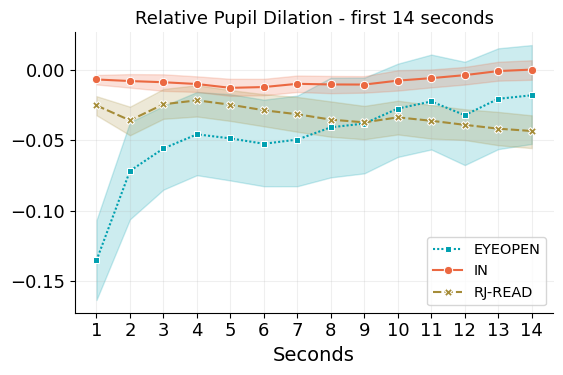

In [219]:
output = 1
_, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=dd, hue='stage', x='n', y='PUPIL_mean_RPD', hue_order=['EYEOPEN', 'IN', 'RJ-READ'], markers=True, style='stage',
             errorbar=("ci", 95), palette={'EYEOPEN': '#00A0B0','IN': '#eb6841', 'RJ-READ': '#a58c38',}, )
ax.set_title('Relative Pupil Dilation - first 14 seconds', fontsize=13)
ax.set_ylabel(None)
ax.set_xlabel('Seconds', fontsize=14)
ax.set_xticks(np.arange(1, 15))
ax.legend(loc='lower right', fontsize='x-small')
ax.grid(alpha=0.2)
sns.despine(ax=ax, top=True, right=True)
plt.tight_layout()
if output:
    plt.savefig('../images/RPD_3line.pdf', bbox_inches='tight')
plt.show()